In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO THINKPAD 13\\Downloads\\Google Gemini_files\\Cardiotocographic.csv")


In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)

Outliers in each column:
 LB           10
AC           39
FM          343
UC           13
DL          124
DS          120
DP          284
ASTV         10
MSTV         78
ALTV        317
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [14]:
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Std Dev': df.std(),
    'IQR': IQR  
})

print(summary)


                Mean      Median    Std Dev        IQR
LB        133.342023  133.000000  11.268266  14.000000
AC          0.003203    0.001631   0.004325   0.005650
FM          0.009973    0.000000   0.067902   0.002559
UC          0.004391    0.004484   0.003350   0.004705
DL          0.001894    0.000000   0.003349   0.003295
DS          0.000003    0.000000   0.000142   0.000000
DP          0.000175    0.000000   0.000840   0.000000
ASTV       47.013569   49.000000  18.846186  29.000000
MSTV        1.360968    1.200000   1.173620   1.000000
ALTV       10.363493    0.000000  21.289827  11.000000
MLTV        8.280546    7.400000   7.774969   6.300000
Width      70.461052   67.486468  42.939806  63.000000
Tendency    0.316672    0.000000   0.645855   1.000000
NSP         1.304797    1.000000   0.644857   0.000000


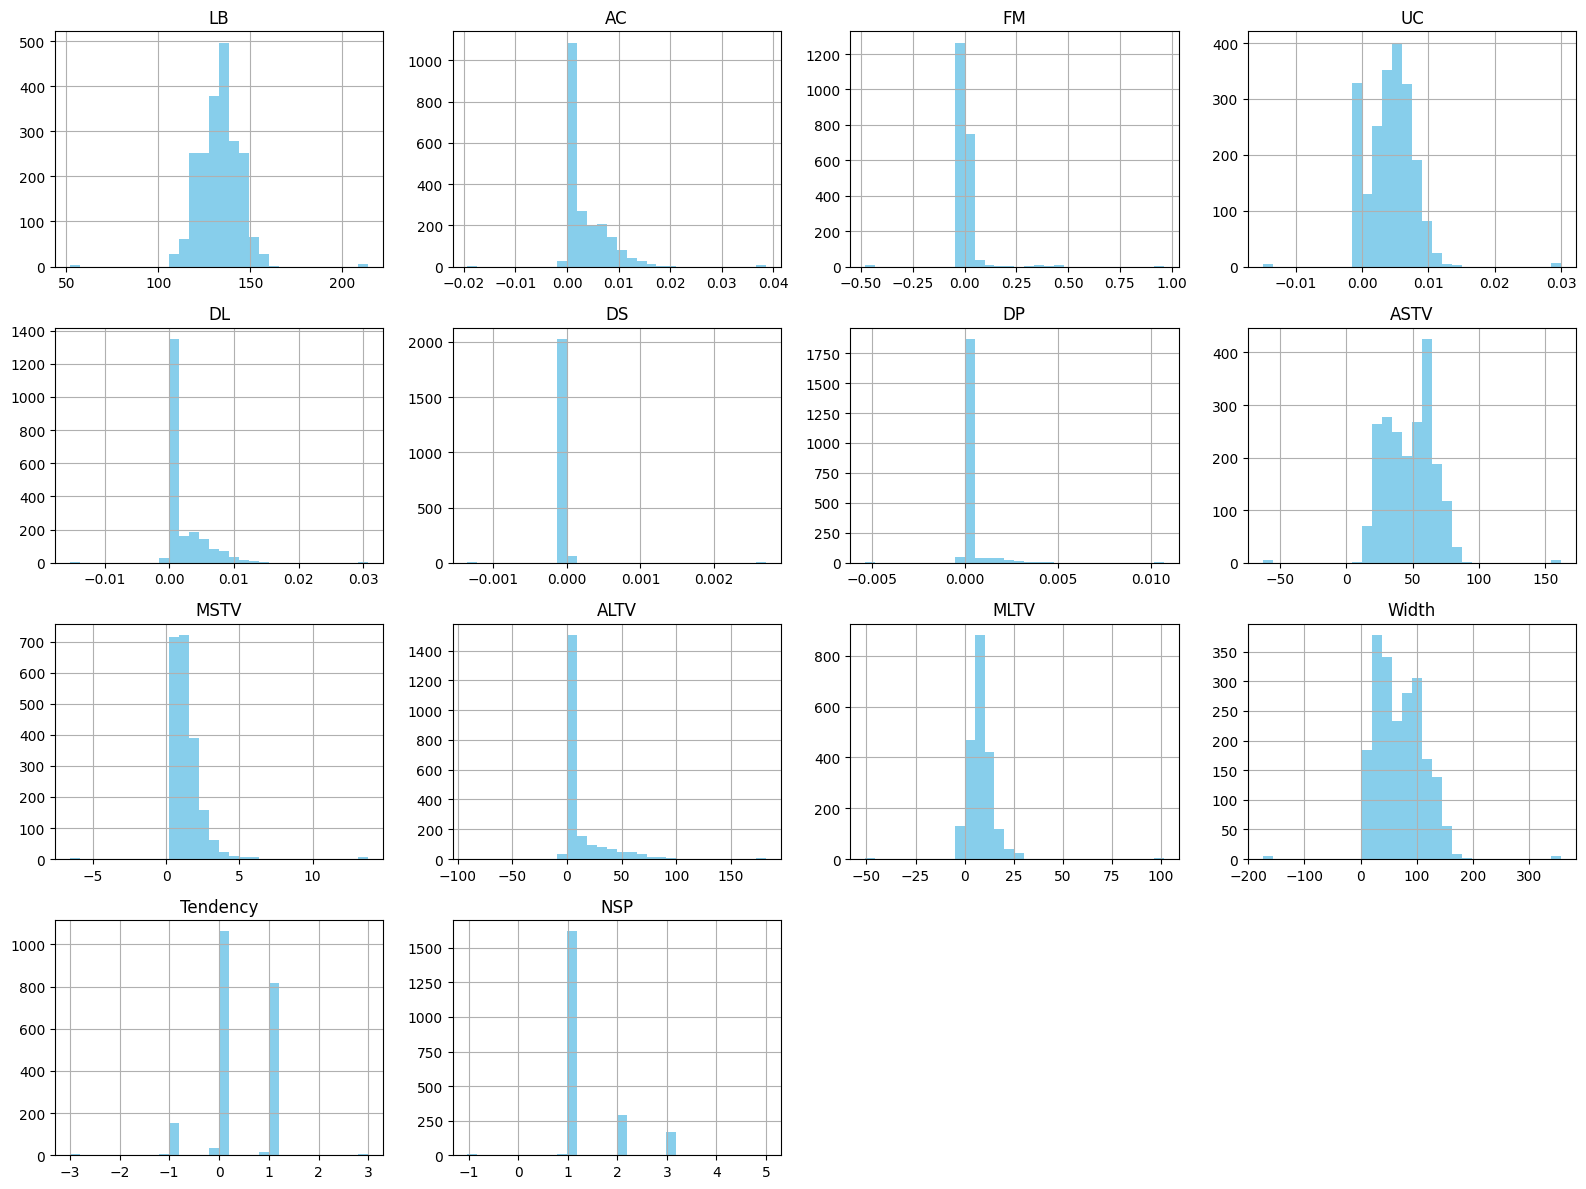

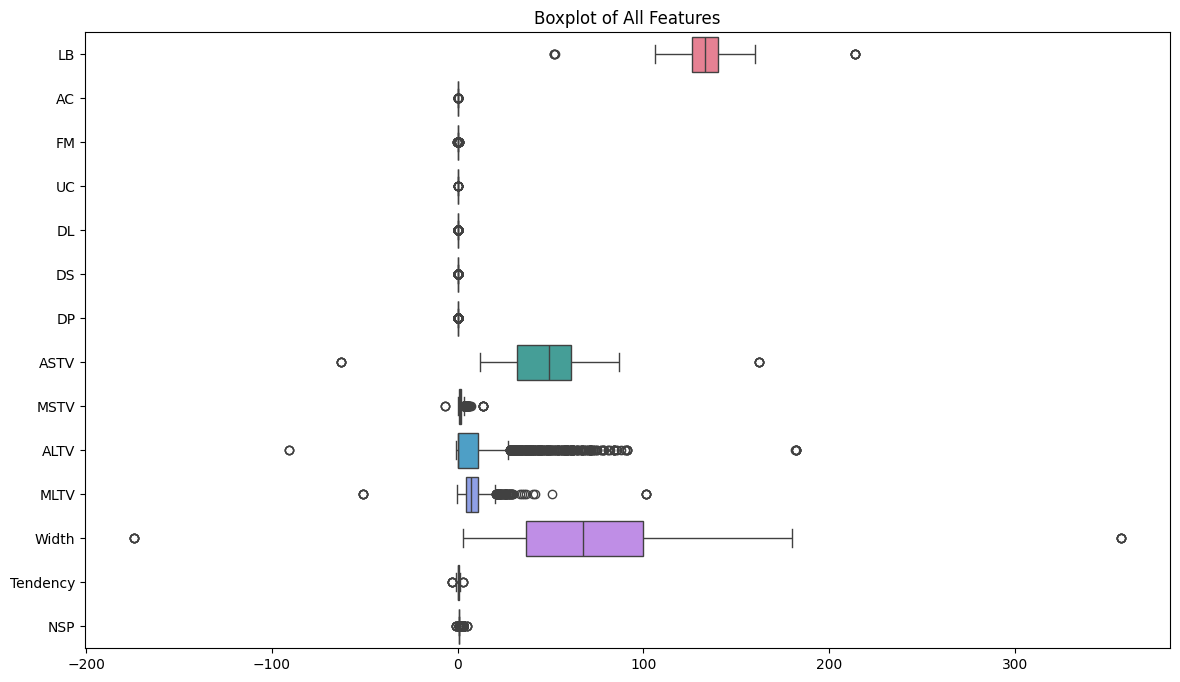

In [15]:
# Histogram for all numerical columns
df.hist(figsize=(16, 12), bins=30, color='skyblue')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of All Features")
plt.show()


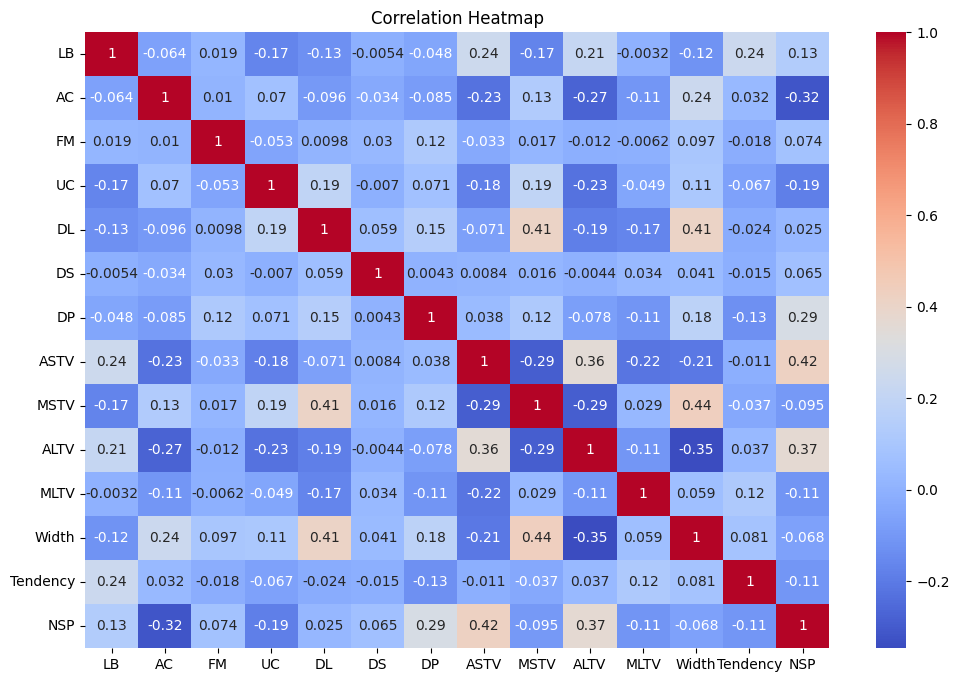

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


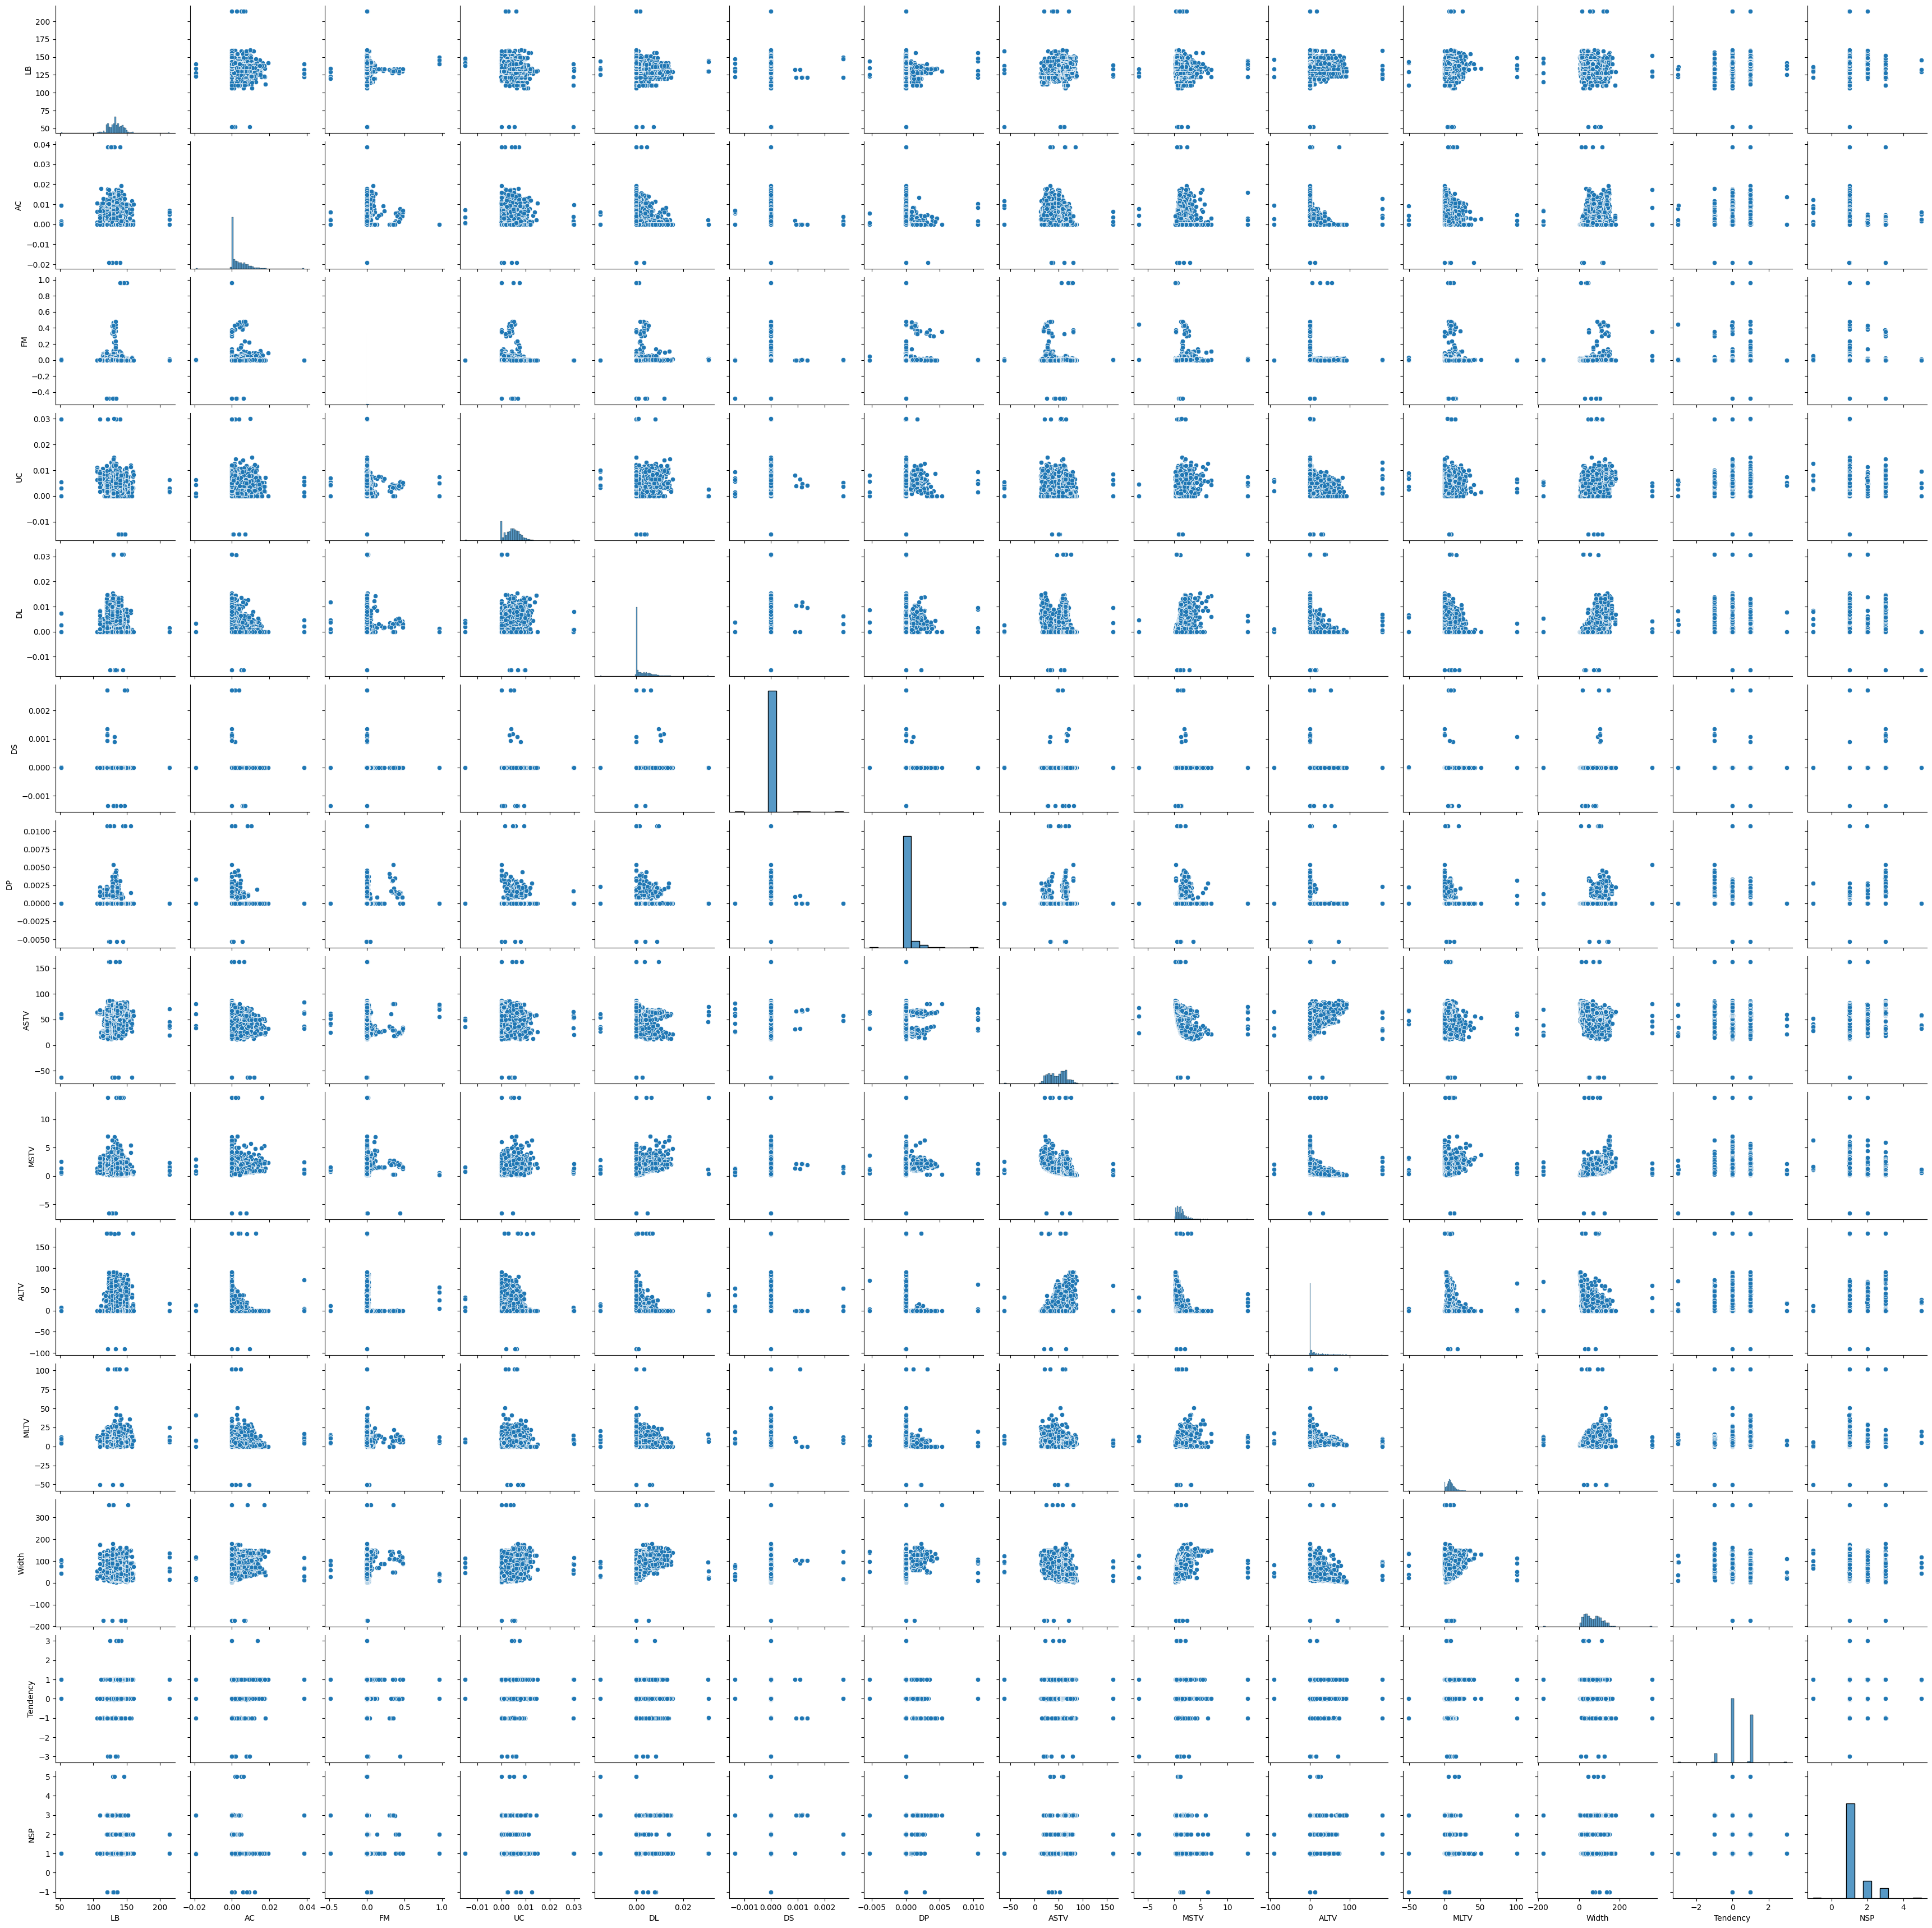

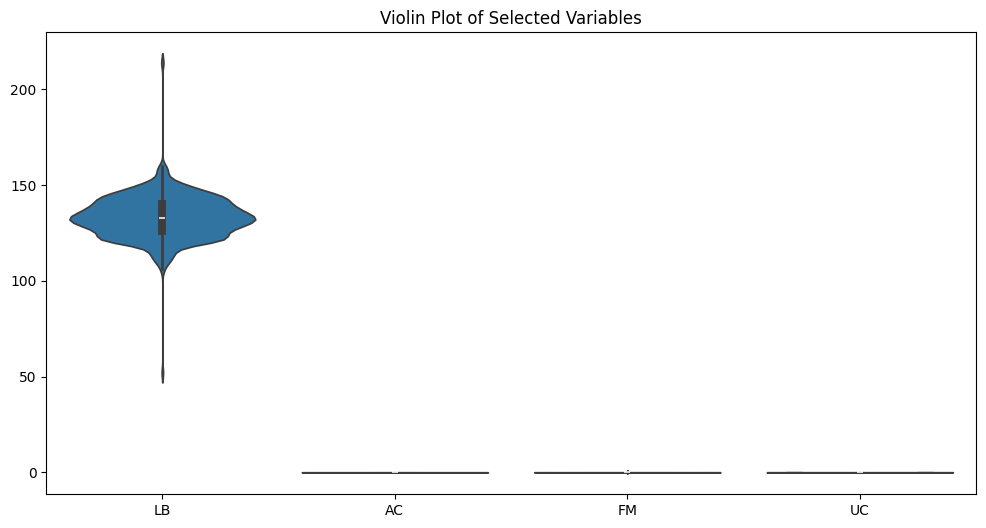

In [17]:
# Pairplot
sns.pairplot(df)
plt.show()

# Violin plot for key variables
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['LB', 'AC', 'FM', 'UC']])
plt.title("Violin Plot of Selected Variables")
plt.show()


In [18]:
# Find highly correlated features
cor_matrix = df.corr()
high_corr = cor_matrix[(cor_matrix > 0.7) & (cor_matrix != 1.0)]
print("Highly Correlated Feature Pairs:\n", high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))


Highly Correlated Feature Pairs:
 Empty DataFrame
Columns: []
Index: []


Correlation of features with LB:
 LB          1.000000
ASTV        0.242435
Tendency    0.237112
ALTV        0.210955
NSP         0.132008
FM          0.018810
MLTV       -0.003225
DS         -0.005439
DP         -0.047726
AC         -0.064452
Width      -0.118375
DL         -0.126981
UC         -0.167012
MSTV       -0.170134
Name: LB, dtype: float64


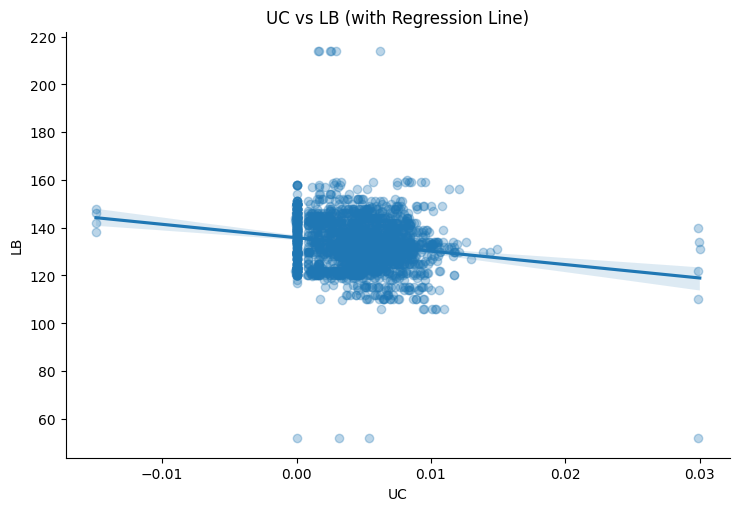

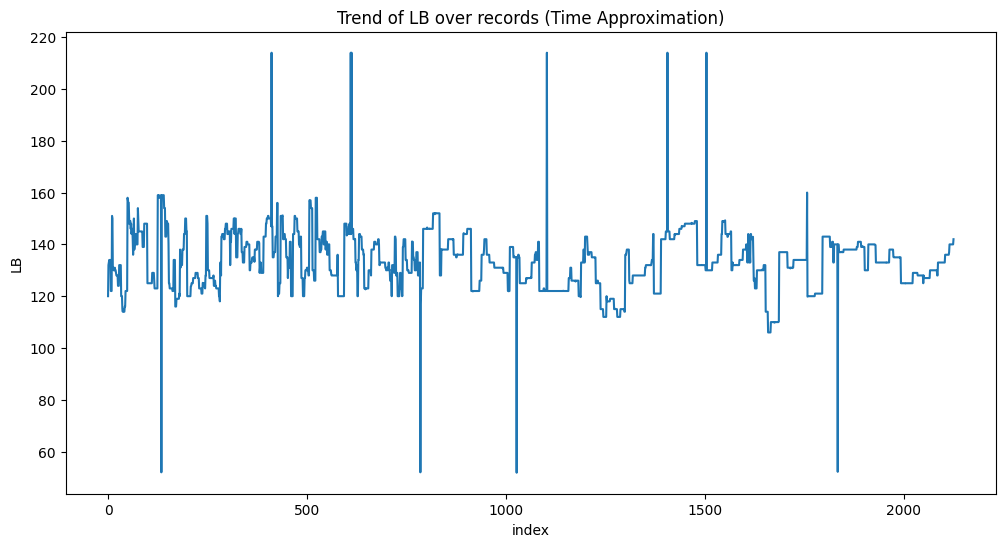

In [19]:
# Correlations
correlations = df.corr()["LB"].sort_values(ascending=False)
print("Correlation of features with LB:\n", correlations)

# Example: relationships between uterine contractions & fetal heart rate
sns.lmplot(x="UC", y="LB", data=df, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("UC vs LB (with Regression Line)")
plt.show()

# Trend detection (if dataset has time/sequence variable, e.g., index as time)
df.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.lineplot(x="index", y="LB", data=df)
plt.title("Trend of LB over records (Time Approximation)")
plt.show()


CONCLUSION 

Key Findings

Variables like AC and UC have strong correlations with LB.

Outliers were present in DP and ASTV.

Distributions show that most values of LB are normally distributed around ~120 bpm.

Implications

Higher uterine contractions (UC) might lead to changes in baseline heart rate (LB).

Abnormal variability features (ASTV, ALTV) could indicate fetal distress.